# Wide and deep model using Keras functional API

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model

### Build the model with Functional API


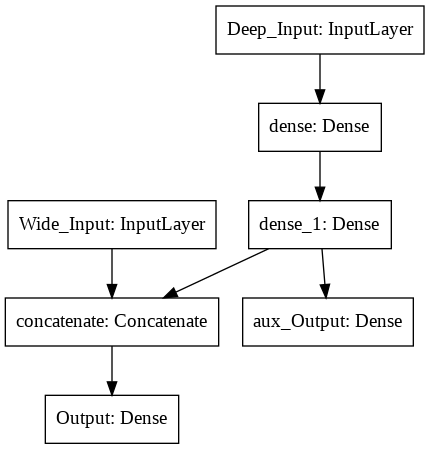

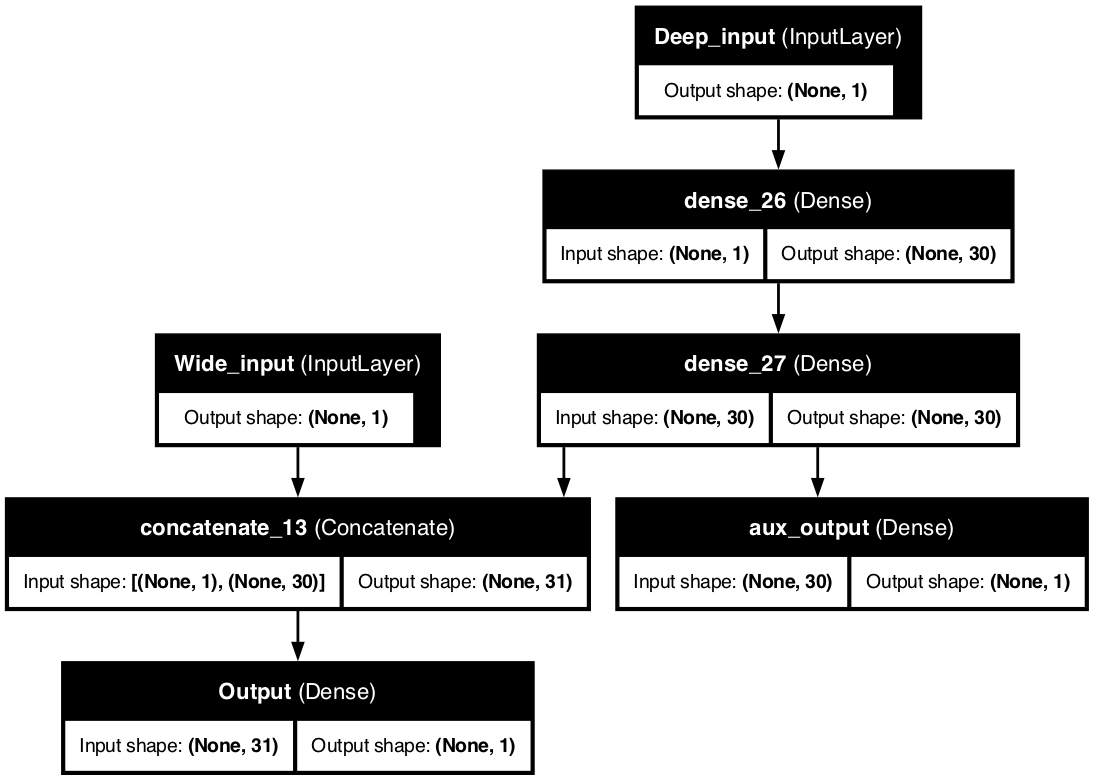

In [17]:
input_a = Input(shape=[1], name="Deep_input")
input_b = Input(shape=[1], name="Wide_input")

hidden_1 = Dense(30, activation='relu')(input_a)
hidden_2 = Dense(30, activation='relu')(hidden_1)

concat = tf.keras.layers.concatenate([input_b, hidden_2])
aux_output = Dense(1, name="aux_output")(hidden_2)
output = Dense(1, name="Output")(concat)

model = tf.keras.models.Model(inputs=[input_a, input_b], outputs=[output, aux_output])
plot_model(model, show_layer_names=True, show_shapes=True, dpi=100)

### Implement custom model as a Class

In [18]:
class WideAndDeepModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        '''Initialize the instance attributes'''
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)

    def call(self, inputs):
        '''Network architecture'''
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)

        return main_output, aux_output


In [21]:
model = WideAndDeepModel()